Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

Loading the 'house_pricing_dataset.csv' file

In [2]:
df = pd.read_csv('house_pricing_dataset.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Q1: The distribution of house prices

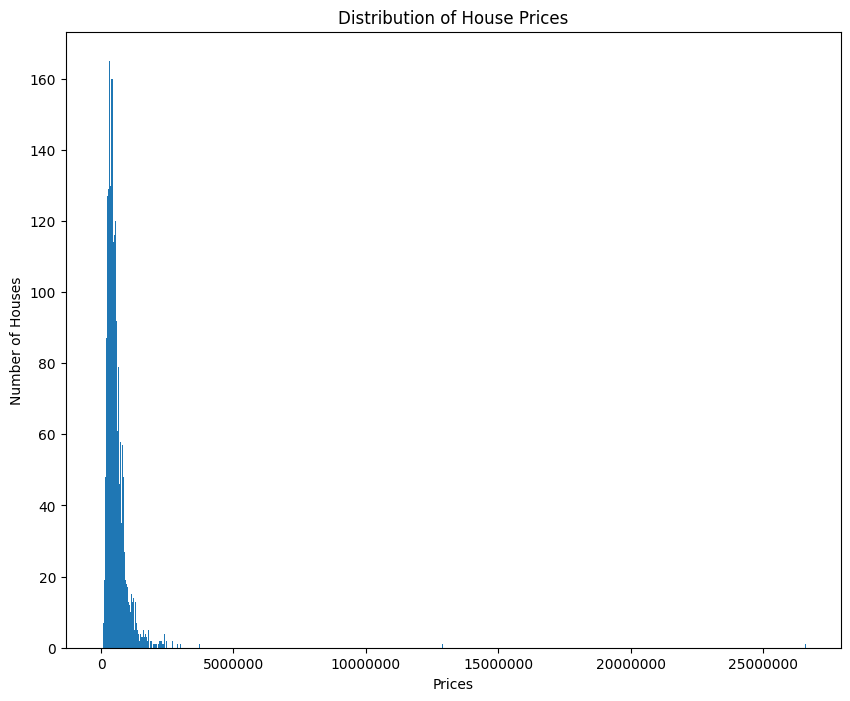

In [8]:
plt.figure(figsize=(10, 8))
plt.hist(df['price'], bins=1500)
plt.title('Distribution of House Prices')
plt.xlabel('Prices')
plt.ylabel('Number of Houses')
plt.ticklabel_format(useOffset=False, style='plain') #removing the scientific notation (1e7)
plt.show()

Q2: The distribution of average house prices across the top 10 cities

In [4]:
# Checking for the top 10 cities
df.city.value_counts().head(10)

Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: city, dtype: int64

In [5]:
# arranging the top 10 cities
top_10_cities = df[df['city'].isin(['Seattle', 'Renton', 'Bellevue', 'Redmond', 'Issaquah', 'Kirkland', 'Kent', 'Auburn', 'Sammamish', 'Federal Way'])]
top_10_cities.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [10]:
# Getting the average house price
average_house_prices = top_10_cities.groupby('city').price.mean().reset_index()
average_house_prices.head()

,city,price
0,Auburn,299340.442766
1,Bellevue,847180.662995
2,Federal Way,289887.703990
3,Issaquah,596163.747475
4,Kent,439492.444648


Text(0, 0.5, 'Price')

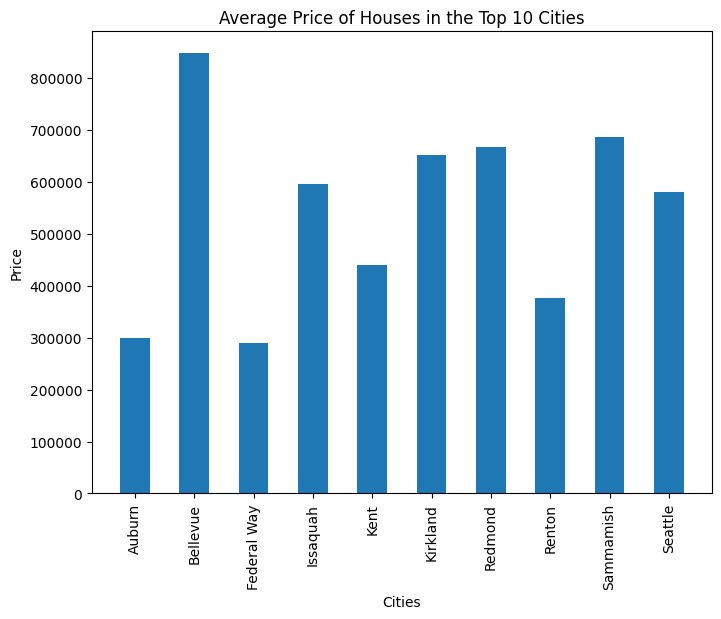

In [17]:
#ploting the bar chart
plt.figure(figsize=(8, 6))
x = np.arange(len(average_house_prices['city']))
y = average_house_prices['price']
plt.bar(x,y, width=0.5)
plt.title('Average Price of Houses in the Top 10 Cities')
plt.xticks(x, average_house_prices['city'], rotation='vertical')
plt.xlabel('Cities')
plt.ylabel('Price')

Q3: The trend of house prices from the earliest date to the latest date in the dataset

In [ ]:
df.date.head()

0    2014-05-02 00:00:00
1    2014-05-02 00:00:00
2    2014-05-02 00:00:00
3    2014-05-02 00:00:00
4    2014-05-02 00:00:00
Name: date, dtype: object

In [18]:
# first covert pandas series to a datetime using 
df["date"] = pd.to_datetime(df["date"])
df.date.head()

price_sum = df.groupby(by='date', as_index=False)['price'].sum()  # group the weekly sales by date

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


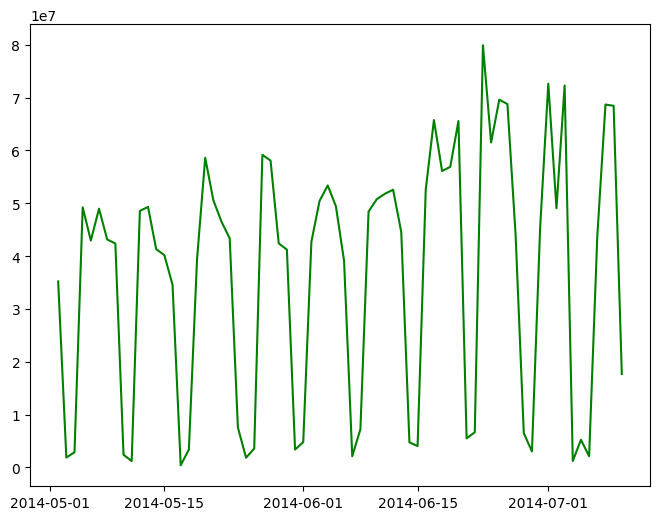

In [20]:
plt.figure(figsize=(8, 6))
price_sum['price'] = price_sum['price'].astype('float')
df.groupby('date')['price'].mean()
plt.plot(price_sum['date'],price_sum['price'], color='green')

Q4: The distribution of maximum bedroom size across the top 10 cities

In [22]:
max_bedroom = top_10_cities.groupby('city').bedrooms.max().reset_index()
max_bedroom


,city,bedrooms
0,Auburn,7.0
1,Bellevue,7.0
2,Federal Way,6.0
3,Issaquah,7.0
4,Kent,6.0
5,Kirkland,5.0
6,Redmond,7.0
7,Renton,7.0
8,Sammamish,6.0
9,Seattle,9.0


<BarContainer object of 10 artists>

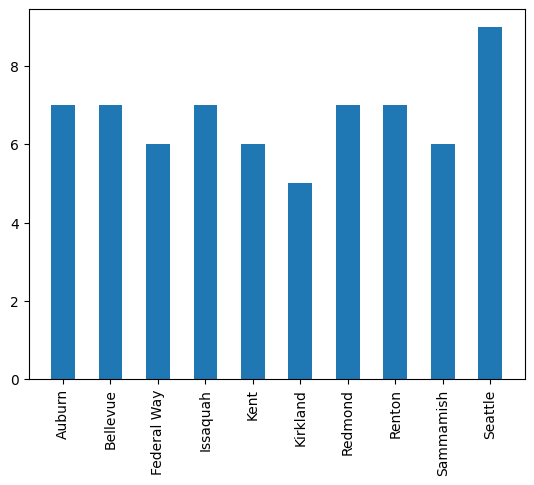

In [26]:
x = np.arange(len(max_bedroom['city']))
y = max_bedroom['bedrooms']
plt.xticks(x, average_house_prices['city'], rotation='vertical')
plt.bar(x,y, width=0.5)
